In [25]:
words = open("names.txt", "r").read().split("\n")

In [26]:
len(words)

32033

In [7]:
min(len(w) for w in words)

2

In [8]:
max(len(w) for w in words)

15

In [9]:
## this is a bigram of characters in w
for w in words[:3]:
    chs = ["<S>"] + list(w) + ["<E>"]
    for ch1, ch2 in zip(chs,chs[1:]):
        print(ch1,ch2)

<S> e
e m
m m
m a
a <E>
<S> o
o l
l i
i v
v i
i a
a <E>
<S> a
a v
v a
a <E>


In [10]:
b = {}
for w in words:
    chs = ["<S>"] + list(w) + ["<E>"]
    for ch1, ch2 in zip(chs,chs[1:]):
        bigram = (ch1,ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [11]:
sorted(b.items(), key = lambda kv: -kv[1])[:5]

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983)]

In [12]:
import torch

In [18]:
N = torch.zeros((27,27), dtype = torch.int32)

In [19]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0

In [20]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [21]:
for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] += 1

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

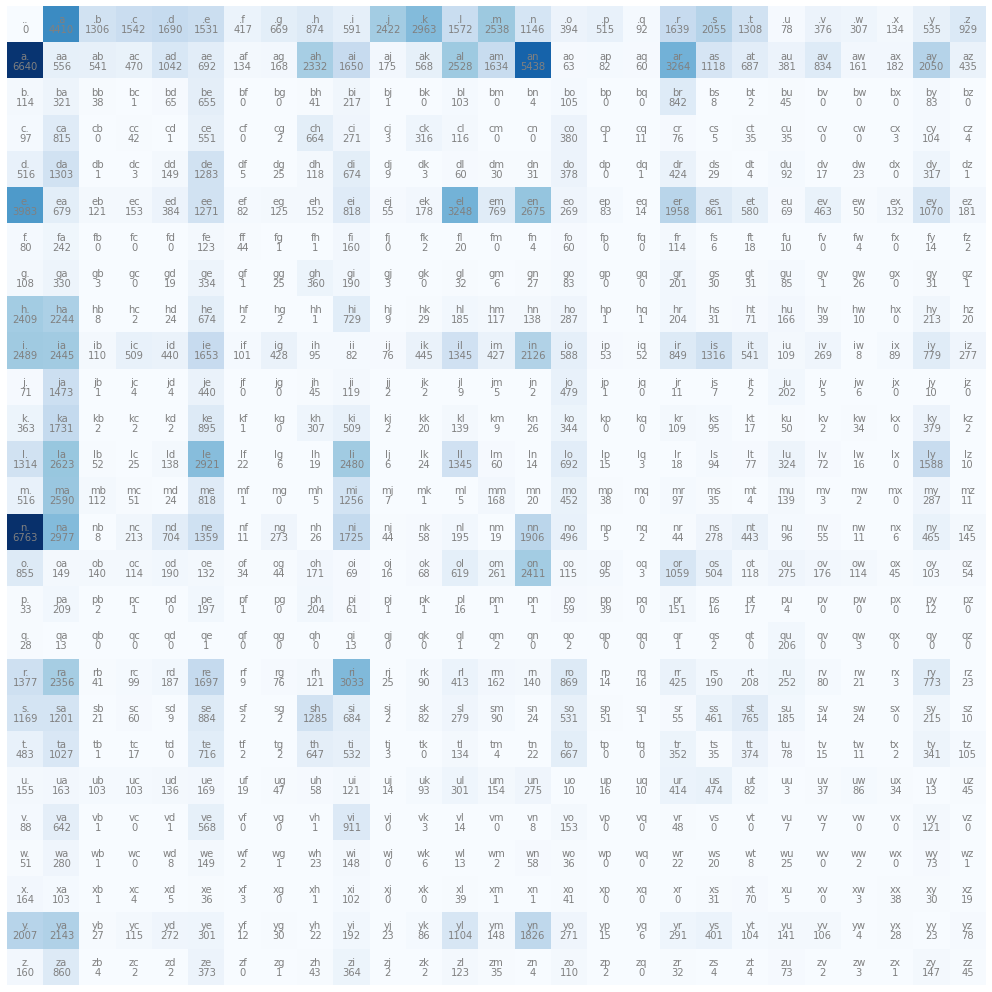

In [23]:
itos = {i:s for s,i in stoi.items()}
plt.figure(figsize=(18,18))
plt.imshow(N, cmap="Blues")
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j,i, chstr,ha="center",va="bottom",color="gray")
        plt.text(j,i, N[i,j].item(),ha="center",va="top",color="gray")
plt.axis("off");

In [27]:
N_prob = N[0,:] / sum(N[0])
N_prob

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [28]:
sum(N[0]).item()

32033

In [29]:
g = torch.Generator().manual_seed(23454353424)

In [30]:
itos[torch.multinomial(N_prob,1).item()]

's'

In [88]:
P = (N+1).float() / N.sum(1, keepdim=True)

In [89]:
def make_word(num,word):
    N_prob = P[num]
    letter = itos[torch.multinomial(N_prob,1,replacement=True,generator=g).item()]
    word += letter
    if stoi[letter] == 0:
        print(word[:-1])
        return
    make_word(stoi[letter],word)

In [90]:
word = ""
for i in range(10):
    make_word(0,word)

mundrea
y
jala
bbelyangeeiaha
amieeorcalign
doekar
zyepi
stikoney
jairona
dh


In [34]:
## generate random names with equal probability of each letter being 1/27
def make_word(num,word):
    N_prob = N[num,:] / sum(N[num,:])
    N_prob = torch.ones(27)/27.0
    letter = itos[torch.multinomial(N_prob,1,replacement=True).item()]
    word += letter
    if stoi[letter] == 0:
        print(word[:-1])
        return
    make_word(stoi[letter],word)
word = ""
for i in range(10):
    make_word(0,word)

gcuuajdhfhbivcqhdmlps
nkpuidm
we
elzmtmokhjceqqgpwgmdypghfppzrktbgynnac
jdslnuocudcobglgqqrtwrrhxuacmkoxoqaeppenadghycfiddtruxvduipesxrcwsdcoldvtifesokniyrtdxfydctgexpixpmrrrhppdpjgjlenjsjoitreyqixcqhbvq
iaflswoalrhebthvajzudatukirxbkwtalg
gfxplxznrihcaosyfxchk
c
lguxjgxhvcxbblfrudhuffpxomqv
ubzivxgfilqzgwk


In [35]:
## log likelihood is a monotonic transformation which means it transfers a set of numbers to another set of numbers while preserving the order !
## one of which is loglikelihood or more like neg log likelihood 

In [91]:
log_prob = 0
n = 0
for w in ["shauraqj"]:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        log_prob -= torch.log(prob)
        n+=1
        print(f"{ch1}{ch2}: {prob:.4f}")
print(f"{log_prob/n=}")

.s: 0.0642
sh: 0.1586
ha: 0.2948
au: 0.0113
ur: 0.1324
ra: 0.1856
aq: 0.0018
qj: 0.0037
j.: 0.0248
log_prob/n=tensor(3.2913)


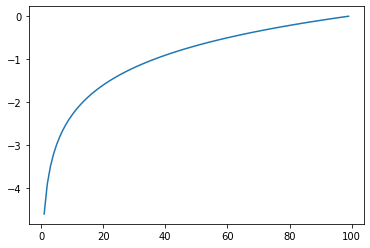

In [56]:
plt.plot(torch.log(torch.linspace(0,1,100)))